## Final Project Submission

* Student name: Sandra Jebet Kiptum
* Student pace: Full time, Hybrid
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


# Microsoft Movie Studio Analysis

Microsoft wants to break into the movie studio industry; they are new here and want to use existing data to ensure maximum success and profitability. What this project aims to achieve is to provide actionable insights by exploring data on existing movie studios that the stakeholders at microsoft movie studio can use to various make decisions


# Business Understanding
## Introduction
This project aims to provide valuable insights into various aspects of the film industry and look into the relationships between differet factors leading to success and profitability in film production. It seeks to provide insights by analyzing data related to film costs, revenue, popularity, directorial experience, genre, and ratings
## Identifying the Real-World Problem
The following are the real world problems that the project is trying to solve:

* Maximizing Revenue<br>
The project aims to help Microsoft optimize their financial returns by analyzing factors like production costs, revenue, and audience reception.

* Optimizing Resource Allocation <br>
Allocating resources effectively is crucial for the success of film projects. Understanding the correlation between different inputs (such as paying directors) and outputs(such as ratings) can assist the company in optimizing their resource allocation

* Improving Audience Satisfaction <br>
Analyzing factors like genre, ratings, and popularity aids filmmakers in creating content that resonates with audiences, enhancing overall satisfaction and engagement.

* Informing Investment Decisions <br>
 Investors can make informed decisions by leveraging insights into factors influencing a film's success, such as production costs, revenue, and audience reception, thereby maximizing their returns on investment in the film industry.

## Understanding the stakeholders
The stakeholders include:
* Film investors seeking to invest in projects with high potential for financial return
* Executives at the movie studio responsible for greenlighting film projects and allocating resources
* Distributors and marketers responsible for promoting and distributing films to audiences.
* Producers, directors, and creative teams involved in the development and production of films.

## Conclusion
In conclusion, this project offers valuable insights into the dynamics of the film industry. By analyzing the relationships between various factors such as production costs, revenue, popularity, directorial experience, genre, and ratings, stakeholders can make more informed decisions to optimize the success of their film projects. Whether it's choosing the right director, allocating resources effectively, or selecting the most appealing genre, the findings of this project have practical results that may be used for improving the outcomes of film production 

# Importing libraries and viewing the data

In [1]:
# Importing all the neccesary libraries
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# loading all our data sets
bom_data = pd.read_csv("./unzippedData/bom.movie_gross.csv")
tmdb_data = pd.read_csv("./unzippedData/tmdb.movies.csv", index_col= 0)
tn_movie_budgets_data = pd.read_csv("./unzippedData/tn.movie_budgets.csv", index_col= 0)
rt_movie_data = pd.read_csv('./unzippedData/rt.movie_info.tsv', sep='\t')
rt_reviews_data = pd.read_csv('./unzippedData/rt.reviews.tsv', sep='\t', encoding='latin1')
# connecting to the database
conn = sqlite3.Connection("./unzippedData/im.db")


At this point i am going to view all the available data sets to determine the ones that would be a fit for the questions that i am trying to answer

#### bom data

In [3]:
bom_data.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [4]:
len(bom_data)

3387

In [5]:
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
bom_data.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### tmdb data

In [7]:
tmdb_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
len(tmdb_data)

26517

In [9]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [10]:
tmdb_data.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

#### tn_movie_budgets_data

In [11]:
tn_movie_budgets_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
len(tn_movie_budgets_data)

5782

In [13]:
tn_movie_budgets_data.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

#### rt movie data


In [14]:
rt_movie_data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


#### rt reviews data


In [15]:
rt_reviews_data.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


To answer my questions:
* Is there a correlation between inputs in terms of the cost input and the revenue generated?
* Is there a relationship between popularity and voter average?
* Is there a correlation between vote average / popularity and the revenue generated
* Is there a relationship between the number of films a director has done of a film and the ratings?
* what is the relationship between genre and ratings 



i will use tmdb_data, imdb databasa and tn_movie_budgets_data as they contain the data we will require. More on the data will be discussed as we go

# Question 1
# Is there a correlation between inputs in terms of the cost input and the revenue generated?

our data set here(tn_movie_budgets_data) contains:
* production budget <br>
which is investment into the movie <br>
* domestic gross <br>
which is the total box office revenue generated from screenings within the country where the movie was produced <br>
* the worldwide gross <br>
which is the total box office revenue generated globally from screenings across all countries and territories. It includes earnings from both domestic and international markets
* release date<br>
which is when the movie was first released to the public
* movie <br>
which is the title of the movie

In [16]:
#viewing our data
tn_movie_budgets_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Data cleaning

In [17]:
#check for null values 
tn_movie_budgets_data.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

we have no null values in this dataframe

In [18]:
#check for duplicationof movie entries
tn_movie_budgets_data["movie"].value_counts()

Home                 3
Halloween            3
King Kong            3
The Gift             2
Serenity             2
                    ..
Suspiria             1
Lady Bird            1
Ratchet and Clank    1
Julia                1
Coraline             1
Name: movie, Length: 5698, dtype: int64

some movies have been input more than once, we need to remove this duplication

In [19]:
#dropping the duplicates
tn_movie_budgets_data = tn_movie_budgets_data.drop_duplicates(subset='movie')

In [20]:
#checking if duplicates were dropped
tn_movie_budgets_data["movie"].value_counts()

The Wood                         1
All is Lost                      1
The X Files: Fight the Future    1
3 Men and a Baby                 1
Foolproof                        1
                                ..
Friday After Next                1
Intolerable Cruelty              1
Sisters                          1
My Big Fat Greek Wedding         1
Coraline                         1
Name: movie, Length: 5698, dtype: int64

we now have no duplicates, lets look further into the dataset

In [21]:
tn_movie_budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5698 non-null   object
 1   movie              5698 non-null   object
 2   production_budget  5698 non-null   object
 3   domestic_gross     5698 non-null   object
 4   worldwide_gross    5698 non-null   object
dtypes: object(5)
memory usage: 267.1+ KB


In [22]:
tn_movie_budgets_data.tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


from above we know that the data set does not contain any null values, however from looking at it we can see that many values in the domestic_gross and worldwide_gross are duplicates of each other:

this could mean that the films never went international and were only seen in the country of production, i'll start with analysing the films that were seen internationally

In [23]:
#first lets make the 2 columns float and remove the dollar sign, removed commas cause they were throwing an error when converting to float
tn_movie_budgets_data["domestic_gross"] = tn_movie_budgets_data["domestic_gross"].str.replace('$', '').str.replace(',', '')
tn_movie_budgets_data["worldwide_gross"] = tn_movie_budgets_data["worldwide_gross"].str.replace('$', '').str.replace(',', '')
# used float as some values were too big for int
tn_movie_budgets_data["domestic_gross"] = tn_movie_budgets_data["domestic_gross"].astype(float)
tn_movie_budgets_data["worldwide_gross"] = tn_movie_budgets_data["worldwide_gross"].astype(float)

In [24]:
#creating a mask for the number of rows that have duplicates in the 2 columns
mask = tn_movie_budgets_data["domestic_gross"] == tn_movie_budgets_data["worldwide_gross"]

In [25]:
#filtering to get values outside the mask
filtered_df = tn_movie_budgets_data[~mask]
len(filtered_df)


4115

In [26]:
filtered_df.tail(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
28,"Oct 27, 2000",George Washington,"$42,000",241816.0,342722.0
34,"Jul 1, 1991",The Last Waltz,"$35,000",321952.0,322563.0
40,"Apr 29, 2005",Funny Ha Ha,"$30,000",77070.0,82698.0
43,"Oct 19, 1994",Clerks,"$27,000",3073428.0,3894240.0
49,"Sep 1, 2015",Exeter,"$25,000",0.0,489792.0
60,"Jun 2, 2006",The Puffy Chair,"$15,000",194523.0,195254.0
74,"Feb 26, 1993",El Mariachi,"$7,000",2040920.0,2041928.0
75,"Oct 8, 2004",Primer,"$7,000",424760.0,841926.0
76,"May 26, 2006",Cavite,"$7,000",70071.0,71644.0


another problem seems to be arising; the zeros in the domestic_gross column

In [27]:
# checking for the rows with zeros in the domestic gross column
num_zeros = (filtered_df["domestic_gross"] == 0).sum()
num_zeros


181

I will also remove the records with zeros in the domestic_gross column as they most likely are errors from data entry

In [28]:
filtered_df = filtered_df[filtered_df["domestic_gross"] != 0]
len(filtered_df)

3934

finally we are now done with the cleaning

In [29]:
#removing dollar sign and commas and conveting to float for the production budget column
filtered_df["production_budget"] = filtered_df["production_budget"].str.replace('$', '').str.replace(',', '')
filtered_df["production_budget"] = filtered_df["production_budget"].astype(float)

# sorting the data by the production budget

filtered_df = filtered_df.sort_values(by='production_budget', ascending=True)

In [30]:
filtered_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0
76,"May 26, 2006",Cavite,7000.0,70071.0,71644.0
75,"Oct 8, 2004",Primer,7000.0,424760.0,841926.0
60,"Jun 2, 2006",The Puffy Chair,15000.0,194523.0,195254.0


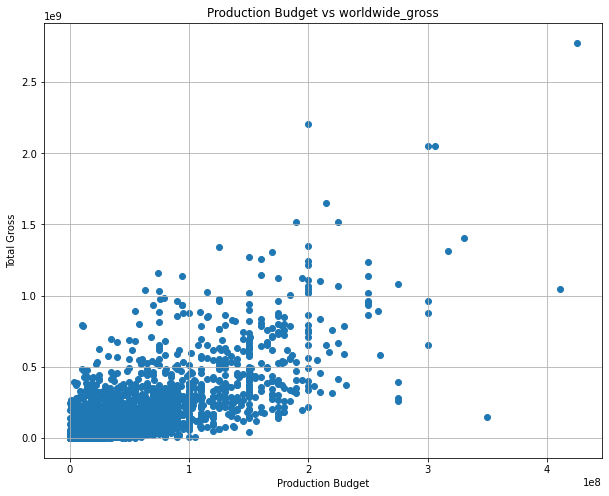

In [31]:
#plotting a scatter graph to see correlation
plt.figure(figsize=(10, 8))
plt.scatter(filtered_df["production_budget"], filtered_df["worldwide_gross"])
plt.title("Production Budget vs worldwide_gross")
plt.xlabel("Production Budget")
plt.ylabel("Total Gross")
plt.grid(True)
plt.show()

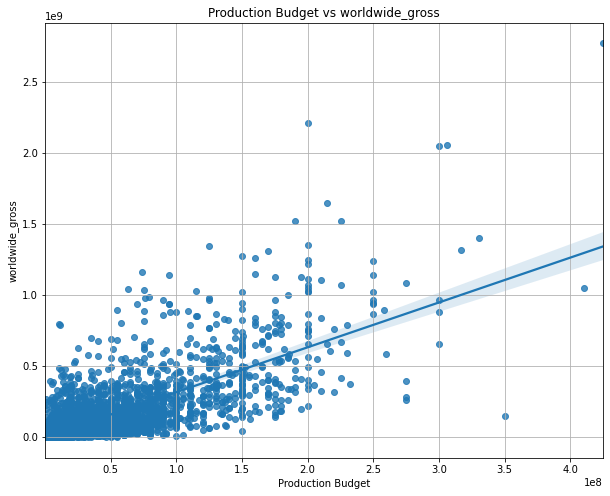

In [32]:
plt.figure(figsize=(10, 8))
sns.regplot(x="production_budget", y="worldwide_gross", data=filtered_df)
plt.title("Production Budget vs worldwide_gross")
plt.xlabel('Production Budget')
plt.ylabel("worldwide_gross")
plt.grid(True)
plt.show()

From the plots above we can see that there is a positive correlation between the production budget and the money made from films that went international

going from this, i would advice microsoft and all the stakeholders to not shy away from investing heavily in the studio and the films it plans to sell worldwide as it directly corresponds to the money they get back


what about films that are only sold locally? <br>
well let's get into it

In [33]:
#using our mask to get films that were only view within the country of production
local_films = tn_movie_budgets_data[mask]

In [34]:
local_films.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
95,"Dec 31, 2020",Moonfall,"$150,000,000",0.0,0.0
42,"Jun 14, 2019",Men in Black: International,"$110,000,000",3100000.0,3100000.0
80,"Dec 13, 2017",Bright,"$90,000,000",0.0,0.0
81,"Dec 31, 2019",Army of the Dead,"$90,000,000",0.0,0.0
6,"Nov 22, 2000",102 Dalmatians,"$85,000,000",66941559.0,66941559.0


let us remove the zeros records with zeros in revenue, it seems they were never sold or there was an issue with data entry

In [35]:
local_films = local_films[local_films['domestic_gross'] != 0]

In [36]:
local_films.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
42,"Jun 14, 2019",Men in Black: International,"$110,000,000",3100000.0,3100000.0
6,"Nov 22, 2000",102 Dalmatians,"$85,000,000",66941559.0,66941559.0
16,"Nov 13, 1998",Meet Joe Black,"$85,000,000",44650003.0,44650003.0
85,"Dec 25, 1998",Mighty Joe Young,"$80,000,000",50632037.0,50632037.0
44,"Jul 23, 1999",Inspector Gadget,"$75,000,000",97387965.0,97387965.0


In [37]:
#removing commas, $ and converting the production_budget column to float
local_films["production_budget"] = local_films["production_budget"].str.replace('$', '').str.replace(',', '')
local_films["production_budget"] = local_films["production_budget"].astype(float)

# sorting the data by the production budget

local_films= local_films.sort_values(by='production_budget', ascending=True)

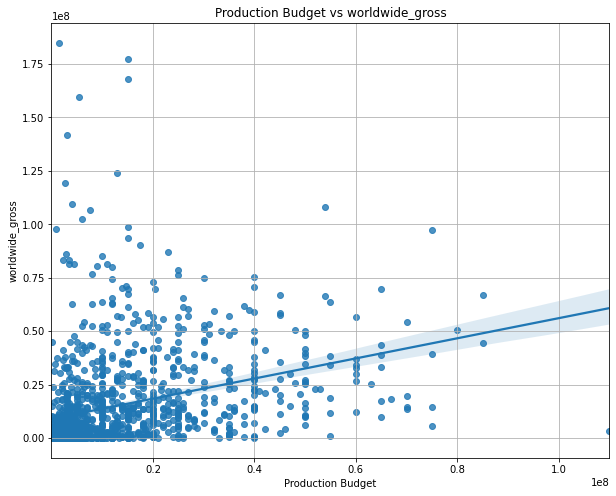

In [38]:
#plotting a scatter plot to see correlation
plt.figure(figsize=(10, 8))
sns.regplot(x="production_budget", y="worldwide_gross", data=local_films)
plt.title("Production Budget vs worldwide_gross")
plt.xlabel('Production Budget')
plt.ylabel("worldwide_gross")
plt.grid(True)
plt.show()

there is a positive correlation here as well although it is weaker, there seems to be alot of money from international markets that make the first correlation stronger. There are also a couple of films that dont follow the trend so it can be a bit unpredictable.

i would advice the stakeholders to put more into international flims as the correlation between the input and revenue is better, more predictable and more stable

## conclusion
to answer our question <br>
Is there a correlation between inputs in terms of the cost input and the revenue generated? <br>
there definately is but the market you plan to sell to also has an effect on this.<br>
selling worlwide shows a more positive correlation as compared to selling locally.


# Question 2 <br>
#   Is there a relationship between popularity and voter average?


The two might seem the same but actually there is quite a difference<br>
popularity indicates the level of interest or attention a movie receives from the audience(it can be influenced by marketing, cultural relevance, star power, genre appeal etc), while vote average reflects the average rating or score assigned to the movie by viewers who have seen it.<br>

How will this be of use to the stakeholders?<br>
this will help them make better decisions when it comes to spending money on marketing, big stars etc and to know if it transaltes to better ratings and ultimately better profits<br>

for this question we will use tmdb_data

In [39]:
tmdb_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [40]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


## Data cleaning

In [41]:
#check for rows that may have been duplicated
tmdb_data.value_counts(subset= "id")

id
109581    3
121803    3
192137    3
192023    3
514791    3
         ..
381094    1
381096    1
381108    1
381123    1
27        1
Length: 25497, dtype: int64

In [42]:
#drop the duplicated rows
tmdb_data = tmdb_data.drop_duplicates(subset='id') 
tmdb_data

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [43]:
# check for the number of movies that have 0 in ratings 
(tmdb_data['vote_average'] == 0).sum()
#i will drop the rows as they seem like errors

130

In [44]:
#dropping the rows
tmdb_data = tmdb_data[tmdb_data['vote_average'] != 0]

our data seems to be clean enough

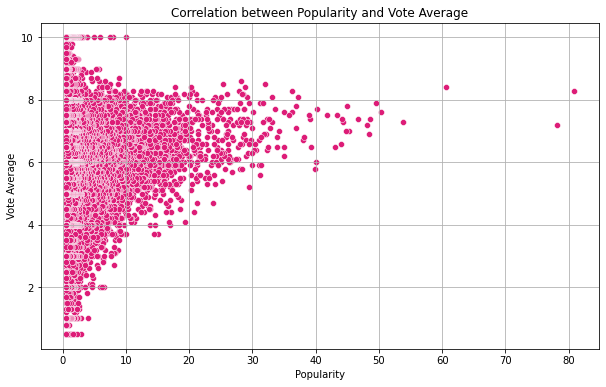

In [45]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tmdb_data, x= "popularity", y="vote_average",color="#dd1c77")#some color for the girlies
plt.title("Correlation between Popularity and Vote Average")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.grid(True)
plt.show()


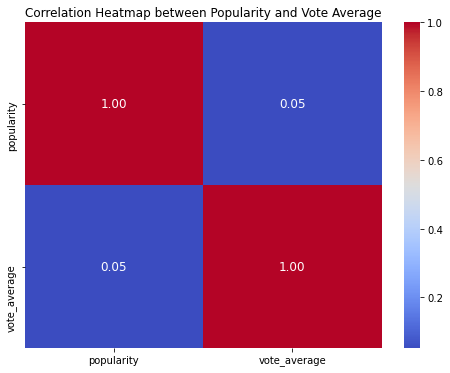

In [46]:
correlation_matrix = tmdb_data[['popularity', 'vote_average']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap between Popularity and Vote Average')
plt.show()

## conclusion
from this we see that there is close to no correlation between the two. From the scatter plot however we see that a bit of popularity does push the rating higher. <br>

from this we can tell that you cannot fully depend on popularity to get good votes<br>

I guesse not out market a bad film<br>

this was a bit underwhelming but it gets more exciting in the next question

# Question 3 <br>
# Is there a correlation between vote average / popularity and the revenue generated?

we've already seen the relationship between vote_average and popularity, the question now is which one translates to more revenue; popularity or vote average?<br>


Well lets find out

for this i'll use the 2 data frames above (tmdb_data and filtered_df which is a subset of tn_movie_budgets_data consisting of films that were sold worldwide)<br>

I'll join the two tables using the names of the movies

In [47]:
filtered_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0
76,"May 26, 2006",Cavite,7000.0,70071.0,71644.0
75,"Oct 8, 2004",Primer,7000.0,424760.0,841926.0
60,"Jun 2, 2006",The Puffy Chair,15000.0,194523.0,195254.0


In [48]:
tmdb_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [49]:
# joinning the 2 data sets
merged_df = pd.merge(filtered_df, tmdb_data, left_on= "movie", right_on="original_title", how="inner")
merged_df.head()


,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,"Nov 12, 2010",Tiny Furniture,50000.0,391674.0,424149.0,"[10749, 35, 18]",47607,en,Tiny Furniture,6.695,2010-11-12,Tiny Furniture,5.9,82
1,"Jul 7, 2017",A Ghost Story,100000.0,1594798.0,2769782.0,"[18, 14, 10749]",428449,en,A Ghost Story,11.886,2017-07-07,A Ghost Story,7.0,906
2,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,"[27, 53]",299245,en,The Gallows,9.166,2015-07-10,The Gallows,4.8,591
3,"Jun 15, 2012",Your Sister's Sister,120000.0,1597486.0,3090593.0,"[18, 35]",84355,en,Your Sister's Sister,7.115,2012-06-14,Your Sister's Sister,6.6,192
4,"Apr 27, 2012",Sound of My Voice,135000.0,408015.0,429448.0,"[878, 18, 9648, 53]",86812,en,Sound of My Voice,7.212,2011-01-22,Sound of My Voice,6.4,169


we had already cleaned the data sets so it won't be neccesary to go through that again

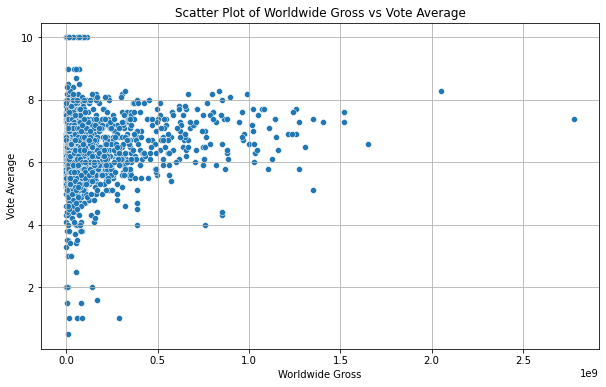

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="worldwide_gross", y="vote_average")
plt.title("Scatter Plot of Worldwide Gross vs Vote Average")
plt.xlabel("Worldwide Gross")
plt.ylabel("Vote Average")
plt.grid(True)
plt.show()

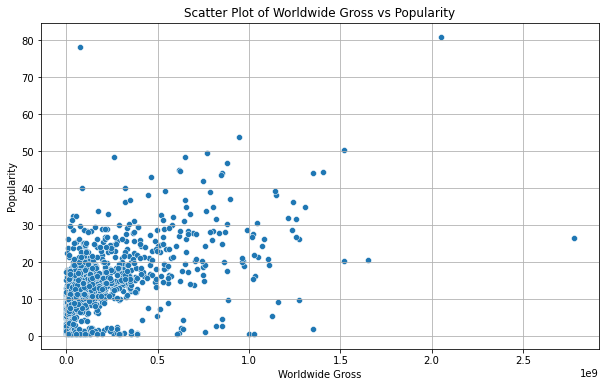

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="worldwide_gross", y="popularity")
plt.title("Scatter Plot of Worldwide Gross vs Popularity")
plt.xlabel("Worldwide Gross")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()

In [52]:

vote_avg_correlation = merged_df["worldwide_gross"].corr(merged_df["vote_average"])
vote_avg_correlation

0.15738449575094002

In [53]:
popularity_correlation = merged_df["worldwide_gross"].corr(merged_df["popularity"])
popularity_correlation

0.545489816561652

## conclusion
from the correlation coefficients as well as the scatter plots we can see that vote_avg has a really weak positive correlation with world wide gross, meaning that although one increases with the other they do not directly affect each other<br>


we can also see that popularity has a moderate positive correlation with worldwide gross income. popularity has more of an effect on the revenue received and should therefore be considered making a film and the film budget.
the more popular a film is the more revenue it generates.<br>

i would reccomend that the stake holders have a good budget for marketing as this directly influences popularity which in turn influences revenue<br>

if you think about it you have to pay to watch the film to vote(meaning the stakeholders have made their money regardless), popularity got you to watch it hence the more positive correlation



# Question 4 <br>
# Is there a relationship between the number of films a director has done and the ratings?

For this question we are going to use the IMDB data base. The ERD was provided and from that i choose the tables that would suit our question best; directors and movie_ratings

In [54]:
#viewing the directors table
pd.read_sql("""
select * 
from directors;
""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [55]:
#join the directors table and the movie ratings table
cursor = conn.cursor()
joint_directors_x_ratings = pd.read_sql("""
    SELECT *
    FROM movie_ratings
    INNER JOIN writers using(movie_id);
""", conn)

In [56]:
joint_directors_x_ratings.head()

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm3057599
1,tt10356526,8.3,31,nm4179342
2,tt1042974,6.4,20,nm1915232
3,tt1043726,4.2,50352,nm0001317
4,tt1043726,4.2,50352,nm0316417


In [57]:
#get a rough idea of how many movies a single director could have done
joint_directors_x_ratings.value_counts(subset="person_id")

person_id
nm6935209    489
nm1546474    247
nm2780568    173
nm4677186    158
nm4664031    158
            ... 
nm4068472      1
nm4067967      1
nm4067676      1
nm4067401      1
nm3164385      1
Length: 76243, dtype: int64

here we can see that one person can have directed multiple films. what we will do is get the average rating for each director<br>
we will then compare ratings to the number of films a person has directed and see what impact one has on the other

In [58]:
type(joint_directors_x_ratings)

pandas.core.frame.DataFrame

In [59]:
#checking for null values
joint_directors_x_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
person_id        0
dtype: int64

In [60]:
#converting the data frame into an sql table for easier querying
joint_directors_x_ratings.to_sql("directors_x_ratings_table", conn, if_exists='replace', index=False)


In [61]:
#finding avg rating for each director and the number of films the director has done
joint_directors_x_ratings = pd.read_sql("""
SELECT person_id, COUNT(*) AS num_records, AVG(averagerating) AS avg_rating
FROM directors_x_ratings_table
GROUP BY person_id;
""", conn)
joint_directors_x_ratings

,person_id,num_records,avg_rating
0,nm0000041,2,6.70
1,nm0000054,1,7.30
2,nm0000080,1,6.90
3,nm0000092,4,7.45
4,nm0000095,8,6.70
...,...,...,...
76238,nm9991132,2,6.20
76239,nm9991653,1,7.50
76240,nm9992927,3,8.50
76241,nm9993281,2,6.60


In [62]:
#finding avg rating for each director and the number of films the director has done
joint_directors_x_ratings = pd.read_sql("""
SELECT person_id, COUNT(*) AS num_records, AVG(averagerating) AS avg_rating
FROM directors_x_ratings_table
GROUP BY person_id;
""", conn)
joint_directors_x_ratings

,person_id,num_records,avg_rating
0,nm0000041,2,6.70
1,nm0000054,1,7.30
2,nm0000080,1,6.90
3,nm0000092,4,7.45
4,nm0000095,8,6.70
...,...,...,...
76238,nm9991132,2,6.20
76239,nm9991653,1,7.50
76240,nm9992927,3,8.50
76241,nm9993281,2,6.60


In [63]:
#viewing our new table
pd.read_sql("""
select * from directors_x_ratings_table;""", conn)

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm3057599
1,tt10356526,8.3,31,nm4179342
2,tt1042974,6.4,20,nm1915232
3,tt1043726,4.2,50352,nm0001317
4,tt1043726,4.2,50352,nm0316417
...,...,...,...,...
169298,tt9708284,4.9,19,nm2203315
169299,tt9708284,4.9,19,nm2628394
169300,tt9722952,7.0,6,nm7620676
169301,tt9844256,7.5,24,nm0849465


In [66]:
#check if a director has been assigned the same movie more than once
pd.read_sql("""
SELECT movie_id, person_id, COUNT(*) AS num_assignments
FROM  directors_x_ratings_table
GROUP BY movie_id, person_id
HAVING COUNT(*) > 1;
""", conn)

,movie_id,person_id,num_assignments
0,tt0100275,nm0749914,2
1,tt0100275,nm1360635,2
2,tt0253093,nm0032545,2
3,tt0253093,nm0679610,2
4,tt0283440,nm0501350,2
...,...,...,...
16317,tt9894394,nm10529312,3
16318,tt9894394,nm5489577,3
16319,tt9900388,nm10531593,2
16320,tt9905476,nm10523880,2


In [67]:
#removing the duplicates 
cursor.execute("""
CREATE TABLE IF NOT EXISTS distinct_directors_films AS
SELECT DISTINCT * 
FROM directors_x_ratings_table;
""")
conn.commit()

In [68]:
pd.read_sql("""select * from distinct_directors_films; """, conn)

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm3057599
1,tt10356526,8.3,31,nm4179342
2,tt1042974,6.4,20,nm1915232
3,tt1043726,4.2,50352,nm0001317
4,tt1043726,4.2,50352,nm0316417
...,...,...,...,...
111847,tt9708284,4.9,19,nm2203315
111848,tt9708284,4.9,19,nm2628394
111849,tt9722952,7.0,6,nm7620676
111850,tt9844256,7.5,24,nm0849465


In [69]:
final_table = pd.read_sql("""
    SELECT person_id, COUNT(*) AS num_records, AVG(averagerating) AS avg_rating
    FROM distinct_directors_films
    GROUP BY person_id
    ORDER BY num_records;
""", conn)

In [70]:
final_table

,person_id,num_records,avg_rating
0,nm0000054,1,7.300000
1,nm0000080,1,6.900000
2,nm0000101,1,5.200000
3,nm0000131,1,5.200000
4,nm0000144,1,6.400000
...,...,...,...
76238,nm0893128,32,5.943750
76239,nm3057599,32,6.393750
76240,nm3583561,32,7.578125
76241,nm5954636,40,7.307500


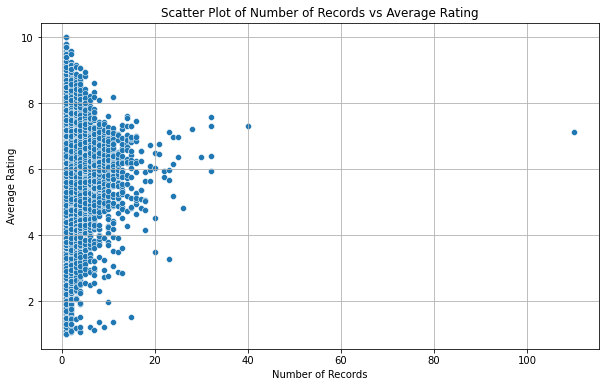

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_table, x='num_records', y='avg_rating')
plt.title('Scatter Plot of Number of Records vs Average Rating')
plt.xlabel('Number of Records')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [85]:
final_table['num_records'].corr(final_table['avg_rating'])


-0.04932645044757862

as we can see there is no direct correlation between the number of films a director has directed and the average rating of the films he made.<br>

from this i would advice the stakeholders to not shy away from taking chances on newer directors as they not only might have different perspectives that might bring a fresh twist to the studio but they might also be cheaper. From the scatter plot we can see that the films with top ratings were mostly from new directors

# Question 5
# what is the relationship between genre and ratings 

is there a genre that the audience prefers over another? If there is it would e in our clients interest have this information in order to create films that apeals to the audiences preferance as this would mean more revenue

for this question we will use the IMDB database as it has all the data we need

In [73]:
# join the tables with genres and ratings(movie basics and movie ratings)
ratings_x_basics = pd.read_sql("""
SELECT basics.genres, ratings.movie_id, ratings.averagerating
FROM movie_basics AS basics
INNER JOIN movie_ratings AS ratings ON basics.movie_id = ratings.movie_id;
""", conn)

In [74]:
# view our new data frame
ratings_x_basics

,genres,movie_id,averagerating
0,"Action,Crime,Drama",tt0063540,7.0
1,"Biography,Drama",tt0066787,7.2
2,Drama,tt0069049,6.9
3,"Comedy,Drama",tt0069204,6.1
4,"Comedy,Drama,Fantasy",tt0100275,6.5
...,...,...,...
73851,Documentary,tt9913084,6.2
73852,"Drama,Family",tt9914286,8.7
73853,Documentary,tt9914642,8.5
73854,None,tt9914942,6.6


In [75]:
#converting to sqlite3 table for easier querying
ratings_x_basics.to_sql('rating_x_basics', conn, if_exists='replace', index=False)
conn.commit()

In [76]:
#checking for duplicate movies
cursor.execute("""
SELECT movie_id
FROM rating_x_basics
GROUP BY movie_id
HAVING COUNT(*) > 1;
""")


we have duplicate movies

In [77]:
#checking for null values
ratings_x_basics.isna().sum()

genres           804
movie_id           0
averagerating      0
dtype: int64

we have null values in the genre column,letscheck if we can remove those columns

In [78]:
len(ratings_x_basics)

73856

In [79]:
#we can drop the records with null values as it is just a small subset of our data 
cursor.execute("""
DELETE FROM rating_x_basics
WHERE genres IS NULL;
""")
conn.commit()

In [80]:
#find the average rating per genre
pd.read_sql("""
SELECT genres, AVG(averagerating) AS genre_average_rating
FROM rating_x_basics
GROUP BY genres;
""", conn)

,genres,genre_average_rating
0,Action,5.757712
1,"Action,Adult,Comedy",4.650000
2,"Action,Adventure",5.223529
3,"Action,Adventure,Animation",6.562874
4,"Action,Adventure,Biography",7.061905
...,...,...
918,Thriller,5.704244
919,"Thriller,War",5.650000
920,"Thriller,Western",7.150000
921,War,6.134043


In [81]:
#there are to many genres to plot, let's try reduce them
# extracting the individual columns
cursor.execute("SELECT  genres FROM rating_x_basics")
genre_rows = cursor.fetchall()
genres = []
for row in genre_rows:
    combined_genre = row[0] 
    individual_genres = combined_genre.split(',')
    genres.extend(individual_genres)
unique_genres = set(genres)
for genre in unique_genres:
    print(genre)

Horror
Musical
Comedy
Adult
Fantasy
Action
Thriller
Western
Animation
Romance
Mystery
Music
Game-Show
Family
History
War
Reality-TV
Biography
Adventure
Documentary
Sport
Drama
News
Short
Crime
Sci-Fi


In [82]:
ratings_x_basics.head()

,genres,movie_id,averagerating
0,"Action,Crime,Drama",tt0063540,7.0
1,"Biography,Drama",tt0066787,7.2
2,Drama,tt0069049,6.9
3,"Comedy,Drama",tt0069204,6.1
4,"Comedy,Drama,Fantasy",tt0100275,6.5


the above are all the genres in the dataframe but split. I will find the rating for each of these by asigning each genre the rating of the movie ie if a movie is family, musical and the rating is 10 both family and musical get 10, i will then find the average for each genre and use that to get a barchart


In [83]:
# Execute the SQL query to select genres and average ratings
cursor.execute("SELECT genres, averagerating FROM rating_x_basics")
rows = cursor.fetchall()
genre_ratings = {}

# Iterate over rows
for row in rows:
    genres = row[0].split(',')  # Split genres by comma
    avg_rating = row[1]
    for genre in genres:
        genre = genre.strip()  
        if genre not in genre_ratings:
            genre_ratings[genre] = []  # Initialize list for genre if not exists
        genre_ratings[genre].append(avg_rating) 

# Calculate average rating for each genre
average_genre_ratings = {}
for genre, ratings in genre_ratings.items():
    average_rating = sum(ratings) / len(ratings)
    average_genre_ratings[genre] = average_rating

# Print average ratings for each genre
for genre, avg_rating in average_genre_ratings.items():
    print(f"{genre}: {avg_rating}")

Action: 5.810360618202613
Crime: 6.115441335935799
Drama: 6.401559048980236
Biography: 7.162273562614873
Comedy: 6.002689415847302
Fantasy: 5.919473189087487
Horror: 5.00344018764659
Thriller: 5.639114031885117
Adventure: 6.196201205134906
Animation: 6.248307515777409
History: 7.040955752212392
Documentary: 7.332090350926571
Mystery: 5.920401447844683
Sci-Fi: 5.4897552130552985
Family: 6.394724501758511
Romance: 6.146607983001951
War: 6.584290738569757
Music: 7.091971544715459
Sport: 6.961492790500417
Western: 5.868214285714282
Musical: 6.498335644937577
News: 7.2713298791018985
Reality-TV: 6.499999999999999
Game-Show: 7.3
Adult: 3.766666666666667
Short: 8.8


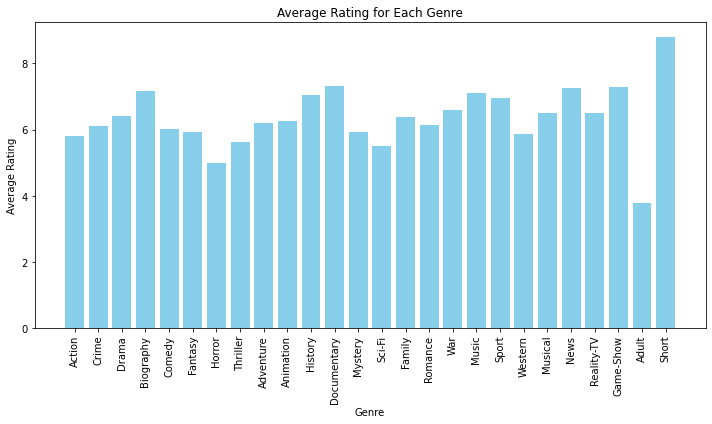

In [84]:
#create a dictionary for plotting
genre_ratings = {
    "Action": 5.810360618202613,
    "Crime": 6.115441335935799,
    "Drama": 6.401559048980236,
    "Biography": 7.162273562614873,
    "Comedy": 6.002689415847302,
    "Fantasy": 5.919473189087487,
    "Horror": 5.00344018764659,
    "Thriller": 5.639114031885117,
    "Adventure": 6.196201205134906,
    "Animation": 6.248307515777409,
    "History": 7.040955752212392,
    "Documentary": 7.332090350926571,
    "Mystery": 5.920401447844683,
    "Sci-Fi": 5.4897552130552985,
    "Family": 6.394724501758511,
    "Romance": 6.146607983001951,
    "War": 6.584290738569757,
    "Music": 7.091971544715459,
    "Sport": 6.961492790500417,
    "Western": 5.868214285714282,
    "Musical": 6.498335644937577,
    "News": 7.2713298791018985,
    "Reality-TV": 6.499999999999999,
    "Game-Show": 7.3,
    "Adult": 3.766666666666667,
    "Short": 8.8
}

genres = list(genre_ratings.keys())
ratings = list(genre_ratings.values())

#plot
plt.figure(figsize=(10, 6))
plt.bar(genres, ratings, color="skyblue")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating for Each Genre")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


from the bar graph above we we can see that short movies are definately better recieved than the other genres.<br>

i would advice the stake holders to push for movies under the short genre and maybe with a mix of documentaries and biographis for better ratings, what they need to steer clear of is the adult gere for sure